# Importing libraries

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# 1. Load in the Data and Examine- (5 marks)

In [2]:
# load Data
df = pd.read_csv(r'E:\1_Data_Science\7_Videos\1 Machine Learning\Decodr\csv\car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Check Shape
df.shape

(398, 9)

In [4]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


"hp" is showing 'object' but as per data it is numerical data

In [29]:
# Changing dtype of 'hp' as it is numeric
df.hp = pd.to_numeric(df.hp, errors='coerce').fillna(0, downcast='infer')
# infer - means that the new numeric column will choose the best data type as per best available option
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [31]:
for i in range(0,9):
    print(f"unique values in column '{df.columns[i]}' = {len(df[df.columns[i]].unique())}") 
    

unique values in column 'mpg' = 129
unique values in column 'cyl' = 5
unique values in column 'disp' = 82
unique values in column 'hp' = 94
unique values in column 'wt' = 351
unique values in column 'acc' = 95
unique values in column 'yr' = 13
unique values in column 'origin' = 3
unique values in column 'car_name' = 305


Columns "cyl" and "origin" needed to be checked further to analyse whether their values are categorical or numerical

In [32]:
# Statistics for each column
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### when mean is approximately equal to 50% ie median i.e data along the both sides of mean/median is equally distributed

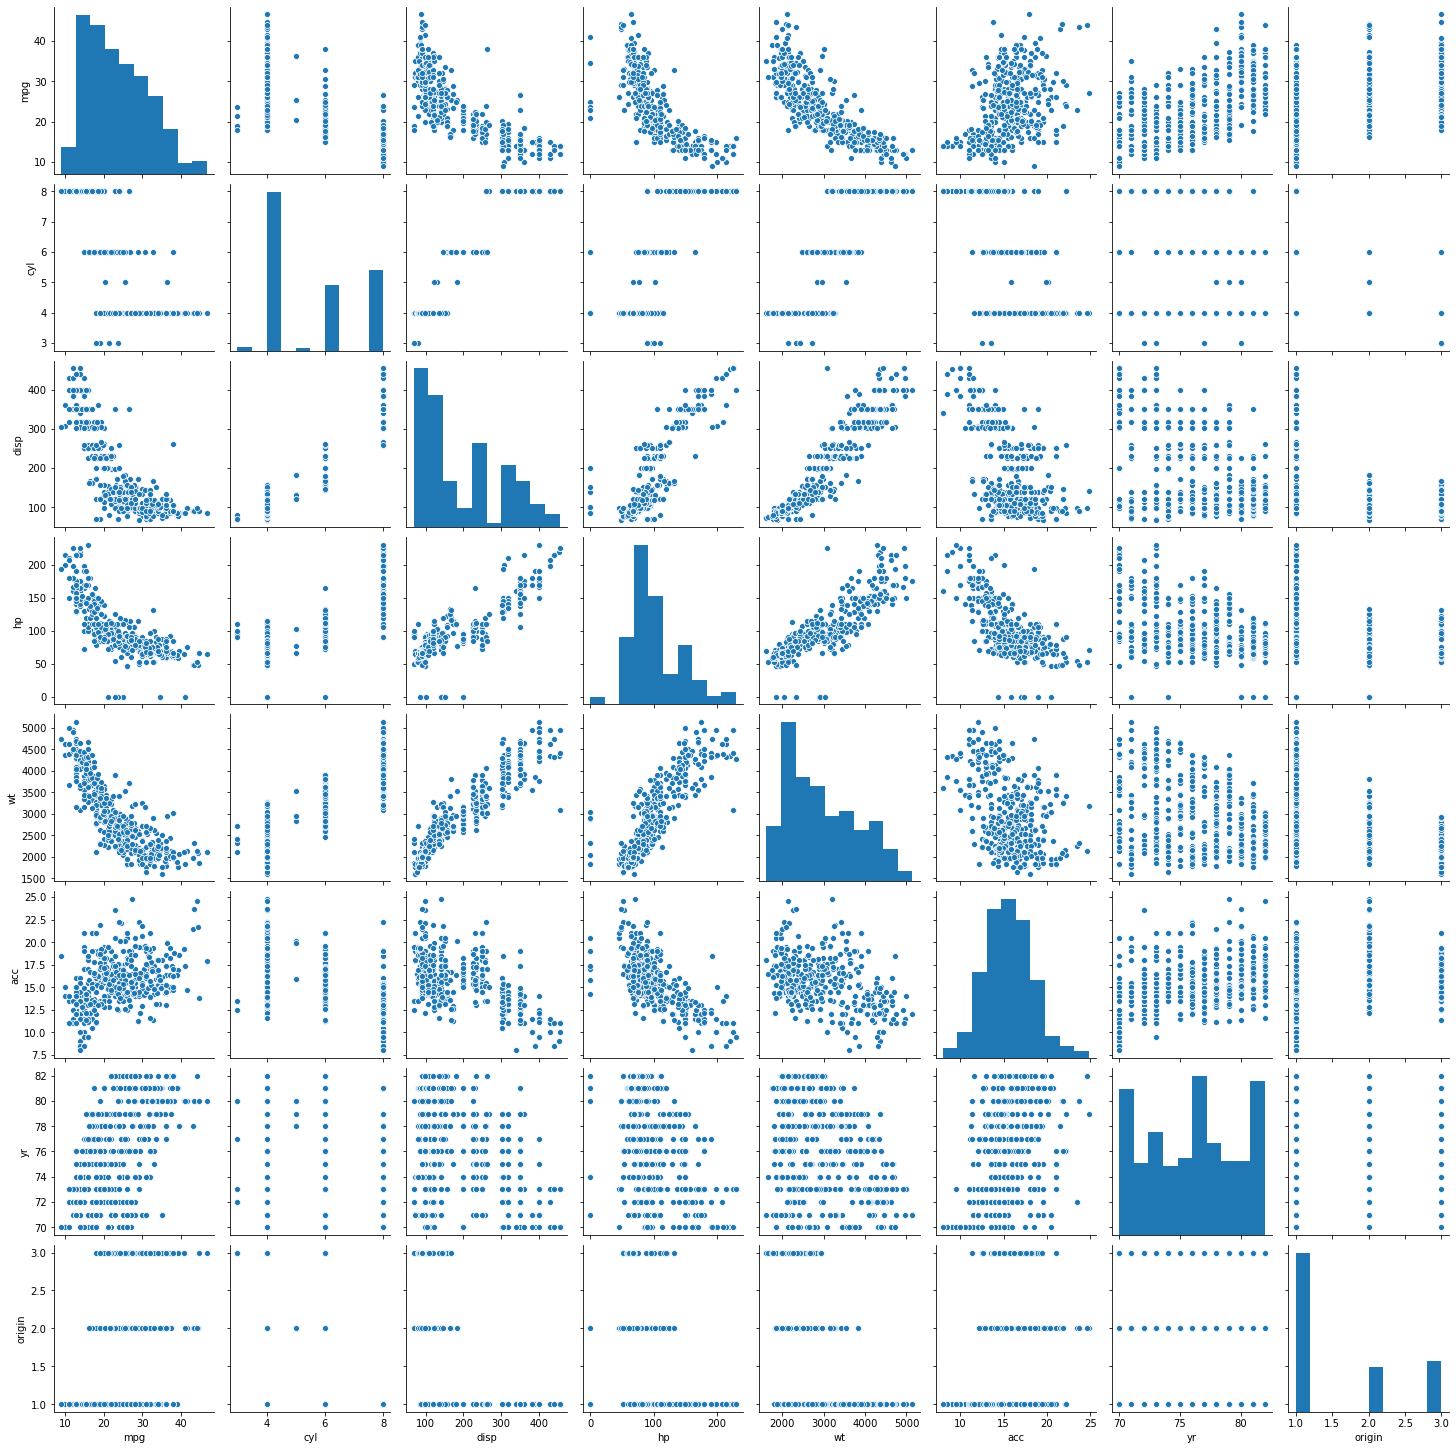

In [33]:
# Plot a pair plot
sns.pairplot(df)
plt.show()

# here we will just see the +ve or -ve relationships b/w different features
# straight and vertical lines makes no sense so there is nothing in them describe or to infer

### Inferences from the above graphs:
1) Acceleration(acc) is following an approx. Normal distribution.                
2) Disp and WT have a positive and almost linear relationship.       
3) mpg and disp are negatively correlated; This might be a negative but non-linear relationship.<br>
4) hp & disp, and hp & acc are linearly related, but disp & scc are not linearly related.

# 2. Perform One Hot encoding categorical Variable i.e on yr & Origin - (2  marks) 
(Consider MPG as Target Variable)

In [34]:
# One hot encoding on categorical variables
df2 = pd.get_dummies(df,drop_first =True,columns=['yr','origin'])
df2.head(6)

,mpg,cyl,disp,hp,wt,acc,car_name,yr_71,yr_72,yr_73,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,buick skylark 320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,plymouth satellite,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,amc rebel sst,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,ford torino,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,8,429.0,198,4341,10.0,ford galaxie 500,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split data into Train and Test and  Build Linear Model  (5 marks)

In [40]:
# Dividing the data into train and test
x = df2.drop(['mpg','car_name'],axis = 1)
y = df2['mpg']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 2)

In [41]:
x_train.shape

(278, 19)

In [80]:
# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)
print('Train Score:',model.score(x_train,y_train))
print('Test Score:',model.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(model.coef_,0))

Train Score: 0.8454091649184475
Test Score: 0.8545209182022329
No.of non-zero co-efficients: 19


This is the basic model with Train and test scores.<br>
Now, we will analyse the model through Statistics and try to improve it and trying to derive inference from it

# 3.Checking For  Linear Regression assumptions: (5 Marks)
    1) Linearity between each dependent variable and the parameters of independent variables (-- Method of testing explained in CW Excel)
    2) No auto correlation (self correlation) (-- Durbin-Watson Test)
    3) Normality of residuals (-- Anderson-Darling Test, Shapiro-Wilk, Jarque-Bera Test)
    4) No multi-collinearity (-- VIF Check) (not an assumption of Gauss-Markov)
    5) No heteroscedasticity (-- White's Test, Breusch-Pagan Test, Glesjar Test)

Linearity is already checked using pair plots. Some of them are not having fairly linear relationships.<br>
Still as a beginner, we will assume linearity and fit linear regression model only.<br>
In a different session, we will learn about a little advanced technique to address such non-linear relationships.

### Auto correlation

No auto correlation can be checked in two ways. One by <br><li> plotting acf and </li><li> other Durbin-watson statistic</li>

In [36]:
import statsmodels.api as sm

In [81]:
X_constant = sm.add_constant(x)
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          1.33e-144
Time:                        23:19:36   Log-Likelihood:                -1000.4
No. Observations:                 398   AIC:                             2041.
Df Residuals:                     378   BIC:                             2120.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1027      1.950     18.000      0.000      31.268      38.937
cyl           -0.0876      0.303     -0.289      0.773      -0.684       0.508
disp           0.0156      0.007      2.178      0.030       0.002       0.030
hp            -0.0059      0.011     -0.557      0.578      -0.027       0.015
wt            -0.0067      0.001    -10.947      0.000      -0.008      -0.006
acc            0.1295      0.085      1.532      0.126      -0.037       0.296
yr_71          1.3881      0.861      1.613      0.108      -0.304       3.080
yr_72          0.2866      0.852      0.336      0.737      -1.389       1.962
yr_73         -0.2935      0.770     -0.381      0.703      -1.807       1.220
yr_74          2.0039      0.902      2.223      0.027       0.231       3.777
yr_75          1.4333      0.876      1.636      0.103      -0.289       3.156
yr_76          2.1676      0.843      2.571      0.011       0.510       3.825
yr_77          3.5997      0.868      4.145      0.000       1.892       5.307
yr_78          3.4175      0.826      4.137      0.000       1.793       5.042
yr_79          5.7990      0.866      6.700      0.000       4.097       7.501
yr_80          9.8177      0.921     10.657      0.000       8.006      11.629
yr_81          7.4266      0.906      8.193      0.000       5.644       9.209
yr_82          8.8553      0.896      9.887      0.000       7.094      10.616
origin_2       2.6155      0.525      4.979      0.000       1.583       3.648
origin_3       2.4590      0.523      4.702      0.000       1.431       3.487
==============================================================================
Omnibus:                       13.624   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.656
Skew:                           0.235   Prob(JB):                     1.98e-05
Kurtosis:                       4.041   Cond. No.                     5.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As Durbin-Watson statistic is close to 2, we can say that there is no auto correlation.<br>
As a thumbrule, if D-W Test Statistic value is between 1.4 till 2.6 (very close to 2), then there is no problem of Auto-Correlation

In [78]:
x.corr().head()

,cyl,disp,hp,wt,acc,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_2,origin_3
cyl,1.000000,0.950721,0.821656,0.896017,-0.505419,0.018890,0.059371,0.181061,-0.031047,0.024407,0.034592,0.001540,-0.017386,0.061520,-0.217300,-0.137637,-0.215765,-0.352861,-0.396479
disp,0.950721,1.000000,0.871927,0.932824,-0.543684,0.043122,0.065905,0.203658,-0.056175,0.033195,0.012820,-0.005370,-0.047301,0.035706,-0.208894,-0.156446,-0.180163,-0.373886,-0.433505
hp,0.821656,0.871927,1.000000,0.837987,-0.673940,0.002187,0.118221,0.229224,-0.081522,-0.012976,-0.013502,0.014890,-0.025091,-0.011763,-0.214384,-0.171841,-0.173835,-0.282993,-0.285318
wt,0.896017,0.932824,0.837987,1.000000,-0.417457,0.008133,0.086937,0.177293,-0.029504,0.069669,0.039138,0.008760,-0.040499,0.028148,-0.176923,-0.148326,-0.177614,-0.298843,-0.440817
acc,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,-0.042472,-0.044256,-0.152383,0.062257,0.049958,0.041400,-0.013222,0.027189,0.025009,0.139079,0.075200,0.112975,0.204473,0.109144


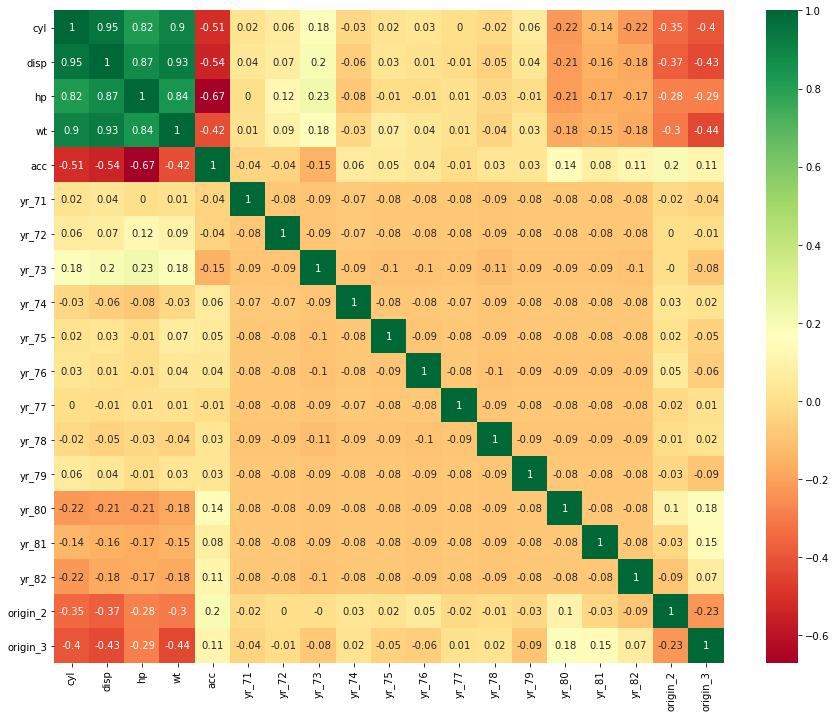

In [76]:
import seaborn as sns

plt.figure(figsize=(15,12))
sns.heatmap(round(x.corr(),2),annot=True,cmap ='RdYlGn')

In [43]:
x2[['wt', 'disp']].corr(method='pearson').values[0][1]

0.9328241468416345

C:\Users\om\anaconda3\envs\machine_learning_updated\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


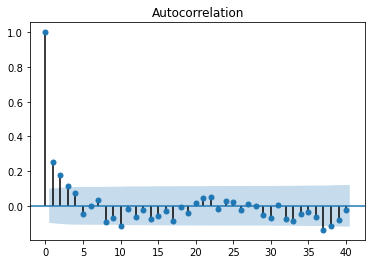

In [82]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

The graph(sharp fall in the begining) tells us that there is no auto correlation.

### Normality of residuals

C:\Users\arka.dey\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


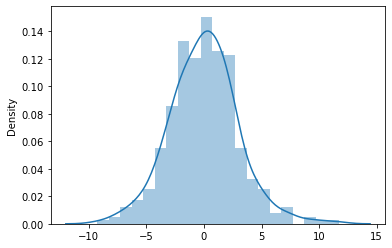

In [53]:
sns.distplot(model.resid)
plt.show()

In [54]:
from scipy import stats
x = model.resid`
stats.shapiro(x) # Fitness test

ShapiroResult(statistic=0.9887188076972961, pvalue=0.0036245279479771852)

We reject null hypotheisi(i.e., residuals are normally distributed) as its p-value is less than 0.05.

In [55]:
(stats.jarque_bera(model.resid))

Jarque_beraResult(statistic=21.656114290898568, pvalue=1.9835106287113824e-05)

We reject null hypotheisi(i.e., skewness and kurtosis are zero) as its p-value is less than 0.05.

### Multi-colinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [round(variance_inflation_factor(X_constant.values, i),2) for i in range(X_constant.shape[1])]
print("VIF values =",vif)

print(df2.drop(['mpg','car_name'],axis = 1).columns)

VIF values = [161.04, 11.23, 23.44, 7.7, 11.37, 2.3, 2.05, 2.01, 2.27, 2.18, 2.27, 2.35, 2.09, 2.38, 2.14, 2.43, 2.35, 2.44, 1.69, 1.84]
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr_71', 'yr_72', 'yr_73', 'yr_74',
       'yr_75', 'yr_76', 'yr_77', 'yr_78', 'yr_79', 'yr_80', 'yr_81', 'yr_82',
       'origin_2', 'origin_3'],
      dtype='object')


<b>Task:</b><br>
Run a better version of the model by looking at Varibales having high VIF and dropping them alternatively in different trail and error rounds, to come up with the best model.

### Heteroscedasticity

In [57]:
name = ['F statistic', 'p-value']
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 2.4143301993778676), ('p-value', 1.8907671532162155e-09)]

Here, p value is less than 0.05 so, it is homoscedasticity distribution. H0 = constant variance (Homoscedacity) Ha = Heteroscedacity.
The moel is suffering from the problem of Heteroscedasticity

#   Perform Featurization  - (1 marks)

In [18]:
# Performing OLS with required variables
import statsmodels.api as sm
X_constant = sm.add_constant(df2[['hp','cyl', 'yr_72', 'yr_74',  'yr_78', 'yr_79', 'yr_80',
       'yr_81', 'yr_82', 'origin_2', 'origin_3']])
model = sm.OLS(y,X_constant).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          1.33e-122
Time:                        11:24:05   Log-Likelihood:                -1073.9
No. Observations:                 398   AIC:                             2172.
Df Residuals:                     386   BIC:                             2220.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4441      0.990     33.768      0.000      31.497      35.391
hp            -0.0565      0.008     -6.825      0.000      -0.073      -0.040
cyl           -1.3242      0.217     -6.097      0.000      -1.751      -0.897
yr_72         -1.3938      0.741     -1.880      0.061      -2.852       0.064
yr_74         -0.0971      0.762     -0.127      0.899      -1.596       1.401
yr_78          2.0462      0.669      3.057      0.002       0.730       3.362
yr_79          4.4556      0.737      6.049      0.000       3.007       5.904
yr_80          7.2458      0.768      9.433      0.000       5.736       8.756
yr_81          5.4527      0.759      7.181      0.000       3.960       6.946
yr_82          6.9705      0.753      9.261      0.000       5.491       8.450
origin_2       2.6103      0.585      4.460      0.000       1.460       3.761
origin_3       3.9100      0.567      6.892      0.000       2.795       5.025
==============================================================================
Omnibus:                       13.315   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.085
Skew:                           0.190   Prob(JB):                     9.71e-06
Kurtosis:                       4.117   Cond. No.                         760.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Data Transformation -( 2 marks)

In [19]:
# Square root
import statsmodels.api as sm
X_constant = sm.add_constant(df2[['hp','cyl', 'yr_72', 'yr_74',  'yr_78', 'yr_79', 'yr_80',
       'yr_81', 'yr_82', 'origin_2', 'origin_3']])
model = sm.OLS(y,np.sqrt(X_constant)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     125.0
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          7.96e-120
Time:                        11:24:05   Log-Likelihood:                -1080.6
No. Observations:                 398   AIC:                             2185.
Df Residuals:                     386   BIC:                             2233.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1781      1.819     25.933      0.000      43.601      50.755
hp            -0.7452      0.132     -5.666      0.000      -1.004      -0.487
cyl           -8.3932      0.916     -9.160      0.000     -10.195      -6.592
yr_72         -1.5860      0.754     -2.104      0.036      -3.068      -0.104
yr_74          0.0841      0.774      0.109      0.913      -1.437       1.606
yr_78          2.2607      0.679      3.328      0.001       0.925       3.596
yr_79          4.7765      0.745      6.412      0.000       3.312       6.241
yr_80          7.1758      0.785      9.145      0.000       5.633       8.719
yr_81          5.6360      0.771      7.309      0.000       4.120       7.152
yr_82          6.9187      0.766      9.029      0.000       5.412       8.425
origin_2       2.4446      0.597      4.097      0.000       1.271       3.618
origin_3       3.7693      0.581      6.490      0.000       2.627       4.911
==============================================================================
Omnibus:                       19.104   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.101
Skew:                           0.059   Prob(JB):                     8.01e-12
Kurtosis:                       4.751   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Square 
import statsmodels.api as sm
X_constant = sm.add_constant(df2[['hp','cyl', 'yr_72', 'yr_74',  'yr_78', 'yr_79', 'yr_80',
       'yr_81', 'yr_82', 'origin_2', 'origin_3']])
model = sm.OLS(y,(X_constant)**2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     117.8
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          5.46e-116
Time:                        11:24:05   Log-Likelihood:                -1089.7
No. Observations:                 398   AIC:                             2203.
Df Residuals:                     386   BIC:                             2251.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5470      0.643     41.274      0.000      25.282      27.812
hp            -0.0002   3.46e-05     -4.578      0.000      -0.000   -9.03e-05
cyl           -0.1343      0.019     -7.113      0.000      -0.171      -0.097
yr_72         -1.4202      0.770     -1.844      0.066      -2.934       0.094
yr_74          0.1353      0.792      0.171      0.864      -1.422       1.692
yr_78          1.9813      0.698      2.838      0.005       0.609       3.354
yr_79          4.5827      0.770      5.953      0.000       3.069       6.096
yr_80          7.7096      0.795      9.700      0.000       6.147       9.272
yr_81          5.7819      0.787      7.346      0.000       4.234       7.329
yr_82          7.2501      0.781      9.287      0.000       5.715       8.785
origin_2       2.8875      0.604      4.780      0.000       1.700       4.075
origin_3       4.0575      0.582      6.967      0.000       2.912       5.203
==============================================================================
Omnibus:                       13.771   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.416
Skew:                           0.325   Prob(JB):                     0.000165
Kurtosis:                       3.792   Cond. No.                     9.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Task:</b><br>
Study till here and practise to come up with the best model.

# 6. Regularization Technique (5 Marks)

In [62]:
## Lasso

from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)

print('Train Score:',model.score(x_train,y_train))
print('Test Score:',model.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(model.coef_,0))

Train Score: 0.6975013809437737
Test Score: 0.7158944556180464
No.of non-zero co-efficients: 3


In [ ]:
model

In [24]:
## Ridge

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
print('Train Score:',model.score(x_train,y_train))
print('Test Score:',model.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(model.coef_,0))

Train Score: 0.8421417469318613
Test Score: 0.8533548324492319
No.of non-zero co-efficients: 19


In [25]:
## Elastic net

from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv = 10 ,
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(x_train,y_train)

print('Optimal alpha: ',cv_model.alpha_)
print('Optimal l1_ratio: ',cv_model.l1_ratio_)
print('Number of iterations',cv_model.n_iter_)

Optimal alpha:  0.0006808319878812255
Optimal l1_ratio:  1.0
Number of iterations 92


In [26]:

# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(x_train, y_train)

print('Train score:',r2_score(y_train, model.predict(x_train))) # Training data performance
print('Test score:',r2_score(y_test, model.predict(x_test))) # Test data performance

Train score: 0.8448602840447244
Test score: 0.8563013091392482


In [27]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [28]:
## Comparing performance of all models:

from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Simple LR',0.84,0.85])
x.add_row(['Lasso LR',0.690,0.71])
x.add_row(['Ridge LR',0.84,0.85])
x.add_row(['Elastic LR',0.84,0.85])

print(x)

+------------+-------------+------------+
|   Model    | Train Score | Test Score |
+------------+-------------+------------+
| Simple LR  |     0.84    |    0.85    |
|  Lasso LR  |     0.69    |    0.71    |
|  Ridge LR  |     0.84    |    0.85    |
| Elastic LR |     0.84    |    0.85    |
+------------+-------------+------------+


Clearly, Elastic net and Ridge are performing better.